In [1]:
# import sys
# !{sys.executable} -m pip install pandas-profiling
# !{sys.executable} -m pip install ppscore

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from pandas_profiling import ProfileReport

In [3]:
# plot configs
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.style.use('fivethirtyeight')         # style used
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

sns.set(font_scale = 1.5)                # plot font scale

In [4]:
df = pd.read_csv('data/glassdoor_job_cleaned.csv')

In [5]:
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  ...  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private  ...   
1   Baltimore, MD        10000+ employees     1984  Other Organization  ...   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private  ...   
3    Richland, WA  1001 to 5000 employees     1965          Government  ...   
4    New York, NY     51 to 200 employees     1998   Company - Private  ...   

  is_loc_hq comp_age python_yn  r_yn  sas_yn  excel_yn  pp_yn  sql_yn  \
0         0       48         1     0       1         1      1       0   
1         0       37         1     1       0         0      0       0   
2         1       11         1     1       1         1      0       1   
3         1       56         1     0       0         0      0       0   
4         1       23         1     1       1         1      0       1   

  spark_yn aws_yn  
0        0      0  
1        0      0  
2        1      0  
3        0      0  
4        0      0  

[5 rows x 30 columns]

## additional data cleaning

### drop duplicates and reset index

In [6]:
# duplicated rows
dup_df = df[df.duplicated()]
dup_df

Job Title  \
29                                      Data Scientist   
30                                      Data Scientist   
58                                      Data Scientist   
59                                      Data Scientist   
86                   Staff Data Scientist - Technology   
..                                                 ...   
737           Sr Scientist, Immuno-Oncology - Oncology   
738                               Senior Data Engineer   
739  Project Scientist - Auton Lab, Robotics Institute   
740                               Data Science Manager   
741          Research Scientist – Security and Privacy   

                  Salary Estimate  \
29     $80K-$90K (Glassdoor est.)   
30     $56K-$97K (Glassdoor est.)   
58     $54K-$93K (Glassdoor est.)   
59    $71K-$119K (Glassdoor est.)   
86   $106K-$172K (Glassdoor est.)   
..                            ...   
737   $58K-$111K (Glassdoor est.)   
738   $72K-$133K (Glassdoor est.)   
739    $56K-$91K (Glassdoor est.)   
740   $95K-$160K (Glassdoor est.)   
741   $61K-$126K (Glassdoor est.)   

                                       Job Description  Rating  \
29   KnowBe4, Inc. is a high growth information sec...     4.8   
30   *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
58   Job Description\n\n**Please only local candida...     4.1   
59   CyrusOne is seeking a talented Data Scientist ...     3.4   
86   Position Summary...\nDrives the execution of m...     3.2   
..                                                 ...     ...   
737  Site Name: USA - Massachusetts - Cambridge\nPo...     3.9   
738  THE CHALLENGE\nEventbrite has a world-class da...     4.4   
739  The Auton Lab at Carnegie Mellon University is...     2.6   
740  Data Science ManagerResponsibilities:\n\nOvers...     3.2   
741  Returning Candidate? Log back in to the Career...     3.6   

                            Company Name         Location  \
29                          KnowBe4\n4.8   Clearwater, FL   
30                             PNNL\n3.8     Richland, WA   
58               ClearOne Advantage\n4.1    Baltimore, MD   
59                         CyrusOne\n3.4       Dallas, TX   
86                          Walmart\n3.2        Plano, TX   
..                                   ...              ...   
737                             GSK\n3.9    Cambridge, MA   
738                      Eventbrite\n4.4    Nashville, TN   
739  Software Engineering Institute\n2.6   Pittsburgh, PA   
740                    Numeric, LLC\n3.2    Allentown, PA   
741    Riverside Research Institute\n3.6  Beavercreek, OH   

                  Headquarters                    Size  Founded  \
29              Clearwater, FL   501 to 1000 employees     2010   
30                Richland, WA  1001 to 5000 employees     1965   
58               Baltimore, MD   501 to 1000 employees     2008   
59                  Dallas, TX    201 to 500 employees     2000   
86             Bentonville, AR        10000+ employees     1962   
..                         ...                     ...      ...   
737  Brentford, United Kingdom        10000+ employees     1830   
738          San Francisco, CA  1001 to 5000 employees     2006   
739             Pittsburgh, PA   501 to 1000 employees     1984   
740            Chadds Ford, PA       1 to 50 employees       -1   
741              Arlington, VA   501 to 1000 employees     1967   

          Type of ownership  ... is_loc_hq comp_age python_yn  r_yn  sas_yn  \
29        Company - Private  ...         1       11         1     1       1   
30               Government  ...         1       56         1     0       0   
58        Company - Private  ...         1       13         0     0       0   
59         Company - Public  ...         1       21         1     1       0   
86         Company - Public  ...         0       59         0     1       0   
..                      ...  ...       ...      ...       ...   ...     ...   
737        Company 

In [7]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [8]:
print(df.shape, df.index)

(467, 30) RangeIndex(start=0, stop=467, step=1)


### simpliying job titles and parsing seniority

In [9]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
## Job title and seniority 
		
##  Job description length 

## hourly wage to annual 

#remove new line from job title

In [10]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [11]:
df['job_simp'].value_counts()

data scientist    192
na                 98
data engineer      75
analyst            71
manager            12
mle                11
director            8
Name: job_simp, dtype: int64

In [12]:
df[df['job_simp'] == 'na'].head(10)

Job Title               Salary Estimate  \
8            Research Scientist    $38K-$84K (Glassdoor est.)   
16      Scientist I/II, Biology   $67K-$137K (Glassdoor est.)   
41                    Scientist   $52K-$113K (Glassdoor est.)   
46  Spectral Scientist/Engineer   $56K-$117K (Glassdoor est.)   
65  R&D Data Analysis Scientist   $65K-$130K (Glassdoor est.)   
66         Analytics Consultant    $52K-$81K (Glassdoor est.)   
68                    Scientist   $50K-$102K (Glassdoor est.)   
73           Research Scientist   $57K-$118K (Glassdoor est.)   
83   Data Management Specialist    $31K-$65K (Glassdoor est.)   
85             Sr. Scientist II  $117K-$231K (Glassdoor est.)   

                                      Job Description  Rating  \
8   SUMMARY\n\nThe Research Scientist I will be ta...     3.3   
16  Scientist I/II, Biology\n\nCambridge, MA\n\nBI...     3.9   
41  We are a global team of 6000 visionaries, doer...     3.4   
46  Thank you for your interest in joining the Cen...     4.7   
65  Applies developed level of subject matter know...     4.0   
66  SpringML is seeking an Analytics Consultant to...     4.4   
68  Scientist\nOrganization\n\n\nEurofins EAG Mate...     2.7   
73  Company Overview\n\nImagine if we could match ...     1.9   
83  Location: Huntsville, AL\n\nClearance: Secret ...     4.5   
85  Sr. Scientist II\nLocation\n\n\nSan Francisco\...     3.5   

                      Company Name              Location       Headquarters  \
8   Rochester Regional Health\n3.3         Rochester, NY      Rochester, NY   
16        Blueprint Medicines\n3.9         Cambridge, MA      Cambridge, MA   
41     Edgewell Personal Care\n3.4         Allendale, NJ        Shelton, CT   
46                   Centauri\n4.7       Beavercreek, OH      Chantilly, VA   
65                    HP Inc.\n4.0         Vancouver, WA      Palo Alto, CA   
66                   SpringML\n4.4      Indianapolis, IN     Pleasanton, CA   
68           EAG Laboratories\n2.7  Maryland Heights, MO      San Diego, CA   
73             GNS Healthcare\n1.9         Cambridge, MA      Cambridge, MA   
83             NMR Consulting\n4.5        Huntsville, AL      Chantilly, VA   
85        Nektar Therapeutics\n3.5     San Francisco, CA  San Francisco, CA   

                       Size  Founded               Type of ownership  ...  \
8          10000+ employees     2014                        Hospital  ...   
16      51 to 200 employees     2011                Company - Public  ...   
41  5001 to 10000 employees     2015                Company - Public  ...   
46    501 to 1000 employees     1999               Company - Private  ...   
65         10000+ employees     1939                Company - Public  ...   
66        1 to 50 employees     2015               Company - Private  ...   
68    501 to 1000 employees     1978  Subsidiary or Business Segment  ...   
73      51 to 200 employees     2000               Company - Private  ...   
83      51 to 200 employees     1996               Company - Private  ...   
85     201 to 500 employees     1990                Company - Public  ...   

   comp_age python_yn r_yn  sas_yn  excel_yn  pp_yn  sql_yn  spark_yn aws_yn  \
8         7         0    0       0         0      0       0         0      0   
16       10         0    0       0         1      0       0         0      0   
41        6         0    0       0         0      0       0         0      1   
46       22         0    0       0         0      0       0         0      0   
65       82         0    0       0         0      0       0         0      0   
66        6         1    1       0         0      0       0         0      0   
68       43         0    0       0         1      0       0         0      0   
73       21         0    1       0         0      0       0         0      1   
83       25         0    1       0         1      0       1         0      0   
85       31         0    0       0         1      0       0         0   

In [13]:
# seniority
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        341
senior    124
jr          2
Name: seniority, dtype: int64

In [14]:
df.head(10)

Job Title               Salary Estimate  \
0             Data Scientist    $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist   $63K-$112K (Glassdoor est.)   
2             Data Scientist    $80K-$90K (Glassdoor est.)   
3             Data Scientist    $56K-$97K (Glassdoor est.)   
4             Data Scientist   $86K-$143K (Glassdoor est.)   
5             Data Scientist   $71K-$119K (Glassdoor est.)   
6             Data Scientist    $54K-$93K (Glassdoor est.)   
7             Data Scientist   $86K-$142K (Glassdoor est.)   
8         Research Scientist    $38K-$84K (Glassdoor est.)   
9             Data Scientist  $120K-$160K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   
5  CyrusOne is seeking a talented Data Scientist ...     3.4   
6  Job Description\n\n**Please only local candida...     4.1   
7  Advanced Analytics – Lead Data Scientist\nOver...     3.8   
8  SUMMARY\n\nThe Research Scientist I will be ta...     3.3   
9  isn’t your usual company. Our work is powered ...     4.6   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   
5                               CyrusOne\n3.4       Dallas, TX   
6                     ClearOne Advantage\n4.1    Baltimore, MD   
7                             Logic20/20\n3.8     San Jose, CA   
8              Rochester Regional Health\n3.3    Rochester, NY   
9                               <intent>\n4.6     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  ...  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private  ...   
1   Baltimore, MD        10000+ employees     1984  Other Organization  ...   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private  ...   
3    Richland, WA  1001 to 5000 employees     1965          Government  ...   
4    New York, NY     51 to 200 employees     1998   Company - Private  ...   
5      Dallas, TX    201 to 500 employees     2000    Company - Public  ...   
6   Baltimore, MD   501 to 1000 employees     2008   Company - Private  ...   
7     Seattle, WA    201 to 500 employees     2005   Company - Private  ...   
8   Rochester, NY        10000+ employees     2014            Hospital  ...   
9    New York, NY     51 to 200 employees     2009   Company - Private  ...   

  python_yn r_yn sas_yn  excel_yn  pp_yn  sql_yn  spark_yn  aws_yn  \
0         1    0      1         1      1       0         0       0   
1         1    1      0         0      0       0         0       0   
2         1    1      1         1      0       1         1       0   
3         1    0      0         0      0       0         0       0   
4         1    1      1         1      0       1         0       0   
5         1    1      0         1      0       1         0       1   
6         0    0      0         1      0       0         0       0   
7         1    0      0         1      0       1         1       1   
8         0    0      0         0      0       0         0       0   
9         1    0      0         0      0       0         1       0   

         job_simp seniority  
0  data scientist        na  
1  data scientist        na  
2  data scientist        na  
3  data scientist        na  
4  data scientist        na  
5  data scientist        na  
6  data scientist        na  
7  data scientist      

### Getting Job description length
get job description length in case it is relevant

In [15]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [16]:
df['desc_len'].describe()

count      467.000000
mean      3812.766595
std       1528.052301
min        407.000000
25%       2729.000000
50%       3703.000000
75%       4704.000000
max      10051.000000
Name: desc_len, dtype: float64

### Converting Hourly wages to annual

Most of the data are per annum salary in thousands (e.g. 53K - 91K), note that we have create min_salary to be 53 and 91, forfeiting the 'K', in another word, divided by 1000. 


There are also hourly data, which we will have to standardize into min_salary and max_salary accordingly. 

8hrs/day * 5 days/week * 50 weeks = 2000 hours per year.  The year has 52 weeks but 2 of those weeks are assigned to holidays and vacation time. This means that an hour salary of 21-34 will be need to be multipled by 2000 which equals to 42K - 68K, which we will then remove the 'K', to be 42 - 68. A faster way to compute it is just to multiply the hourly salary data by 2, which yield the same result. 

In [17]:
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['hourly'] == 1 else x['min_salary'], axis = 1)
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['hourly'] == 1 else x['max_salary'], axis = 1)

In [18]:
df[df['hourly'] == 1][['hourly','min_salary', 'max_salary']]

hourly  min_salary  max_salary
153       1          34          48
165       1          42          68
185       1          36          50
190       1          42          68
197       1          30          50
275       1          48          78
287       1          50          56
327       1          42          58
328       1          20          34
448       1          54          94

### Impute missing Rating rows
impute median values to missing rows

In [19]:
df['Rating'] = df.apply(lambda x: x['Rating'] if x['Rating'] >= 0.0 else df['Rating'].median() , axis = 1)

In [20]:
df['Rating'].value_counts()

3.7    43
3.8    40
3.9    39
3.5    31
4.0    31
3.4    29
3.6    26
4.3    24
3.2    23
4.7    21
3.3    20
4.4    20
4.2    19
3.1    15
4.1    14
2.9     9
3.0     9
4.6     8
2.7     8
2.8     6
2.6     6
4.8     5
4.5     5
5.0     4
1.9     2
2.3     2
2.2     2
2.5     2
2.4     2
2.1     2
Name: Rating, dtype: int64

### Datatype update
Some numerical columns should be categorical, so we can coerce the datatype of those.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          467 non-null    object 
 1   Salary Estimate    467 non-null    object 
 2   Job Description    467 non-null    object 
 3   Rating             467 non-null    float64
 4   Company Name       467 non-null    object 
 5   Location           467 non-null    object 
 6   Headquarters       467 non-null    object 
 7   Size               467 non-null    object 
 8   Founded            467 non-null    int64  
 9   Type of ownership  467 non-null    object 
 10  Industry           467 non-null    object 
 11  Sector             467 non-null    object 
 12  Revenue            467 non-null    object 
 13  hourly             467 non-null    int64  
 14  employer_provided  467 non-null    int64  
 15  min_salary         467 non-null    int64  
 16  max_salary         467 non

In [22]:
list(set(df.select_dtypes(include=["number"]).columns))

['min_salary',
 'Founded',
 'avg_salary',
 'is_loc_hq',
 'employer_provided',
 'sas_yn',
 'sql_yn',
 'Rating',
 'excel_yn',
 'aws_yn',
 'desc_len',
 'max_salary',
 'python_yn',
 'pp_yn',
 'r_yn',
 'comp_age',
 'hourly',
 'spark_yn']

In [23]:
to_cat = ['is_loc_hq',
 'r_yn',
 'spark_yn',
 'pp_yn',
 'hourly',
 'python_yn',
 'aws_yn',
 'employer_provided',
 'sql_yn',
 'excel_yn',
 'sas_yn']

In [24]:
for i in to_cat:
    df[i] = df[i].astype('category')

In [25]:
list(set(df.select_dtypes(include=["number"]).columns))

['min_salary',
 'Founded',
 'avg_salary',
 'Rating',
 'desc_len',
 'max_salary',
 'comp_age']

## EDA

### Data Overview - Numerical

In [64]:
numerical = [i for i in df.select_dtypes(include=['number']).columns.values.tolist() if i not in ['min_salary','max_salary', 'avg_salary']]
categorical = df.select_dtypes(include=['object', 'category']).columns.values.tolist()
target_label = ['avg_salary']

print('numerical: ', len(numerical))
print('categorical: ', len(categorical))

numerical:  4
categorical:  26


`.describe()` enable us to have a high level view of the distribution and skewness of our data. By looking at the mean, standard deviation, and quartile values of the columns, most numerical columns are spread relatively evenly around the mean.

`comp_age` has a right skewed distribution and high standard deviation compared to it's mean, it's maximum value is far from the mean and median as well. We would need further exploration to figure out if these data makes sense, and handle any possible outliers.

In [27]:
df.describe().round(2)

Rating  Founded  min_salary  max_salary  avg_salary  comp_age  desc_len
count  467.00   467.00      467.00      467.00      467.00    467.00    467.00
mean     3.72  1832.44       74.76      128.27      138.15     45.61   3812.77
std      0.56   508.66       29.94       44.00       52.37     52.49   1528.05
min      1.90    -1.00       15.00       16.00       18.50     -1.00    407.00
25%      3.40  1939.00       53.50       98.00      103.50     11.00   2729.00
50%      3.70  1991.00       71.00      124.00      132.50     25.00   3703.00
75%      4.10  2007.00       90.50      150.00      166.50     56.00   4704.00
max      5.00  2019.00      202.00      306.00      355.00    277.00  10051.00

/Users/Loong/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


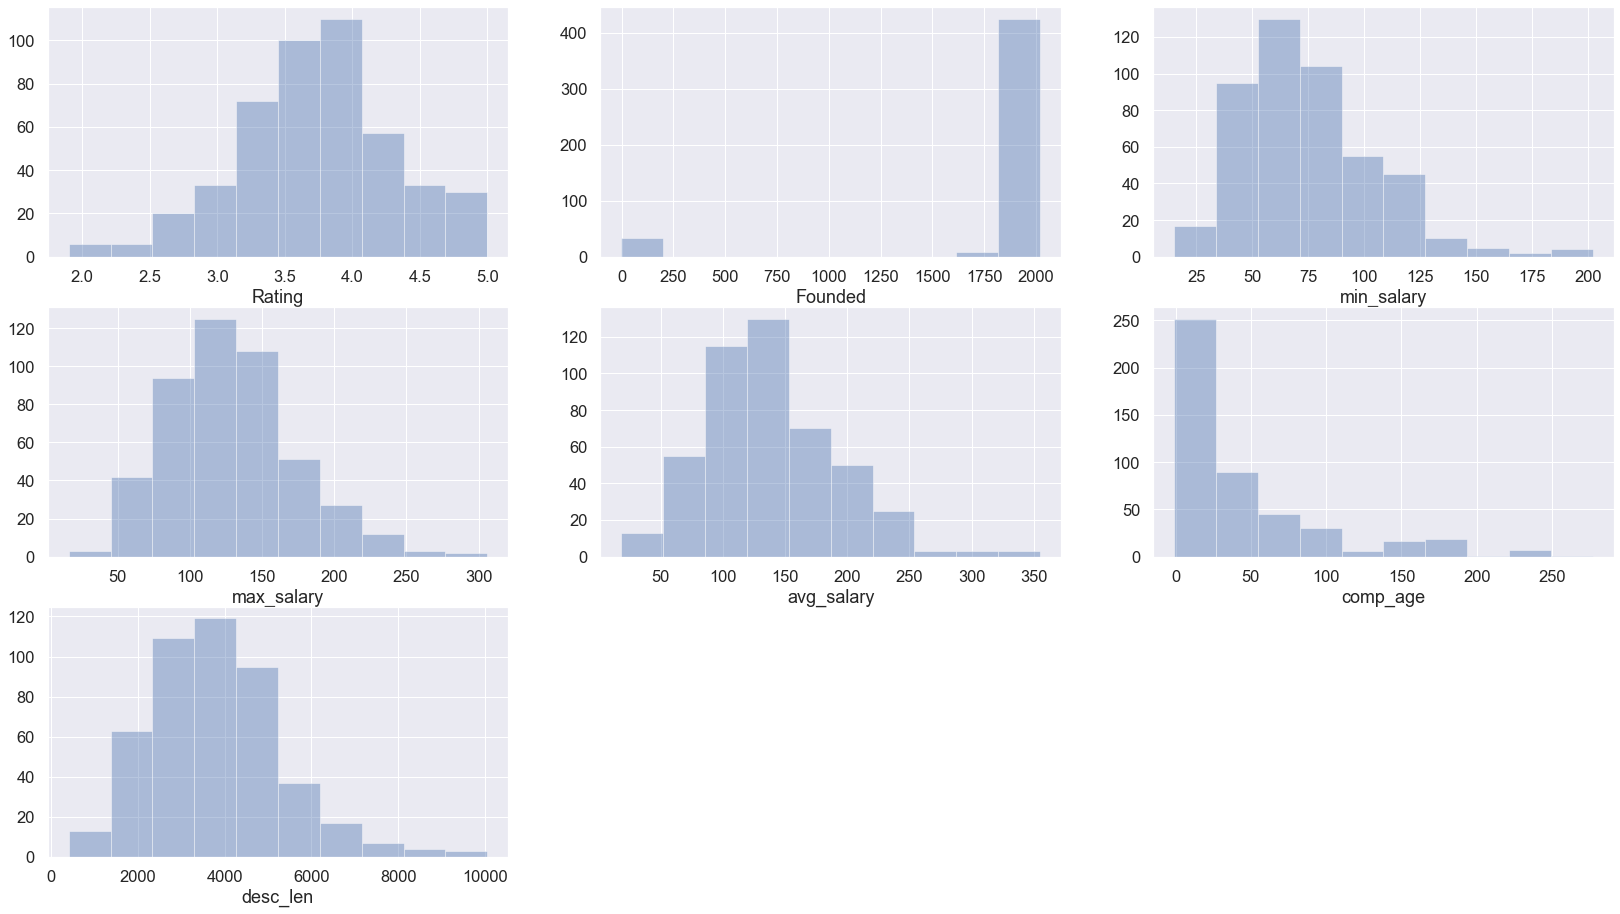

In [28]:
plt.figure(figsize = (25,30))

for i in enumerate(numerical):
    plt.subplot(6, 3, i[0]+1)
    sns.distplot(df[i[1]], kde = False, bins = 10)

### Data Overview - Categorical

In [29]:
df[categorical].apply(lambda x: x.nunique()).sort_values(ascending = False)

Job Description      463
Salary Estimate      416
Company Name         343
company_txt          343
Job Title            264
Location             200
Headquarters         198
Industry              60
job_state             37
Sector                25
Revenue               14
Type of ownership     11
Size                   9
job_simp               7
seniority              3
hourly                 2
is_loc_hq              2
python_yn              2
r_yn                   2
sas_yn                 2
excel_yn               2
pp_yn                  2
sql_yn                 2
spark_yn               2
aws_yn                 2
employer_provided      2
dtype: int64

It seems that we have 8 variables that are of high cardinality, which are not surprising given nature of these data:

    -Job Description      463
    -Salary Estimate      416
    -Company Name         343
    -company_txt          343
    -Job Title            264
    -Location             200
    -Headquarters         198
    -Industry              60

In [30]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue'
             , 'company_txt', 'job_state', 'is_loc_hq', 'python_yn'
             ,'r_yn', 'sas_yn', 'excel_yn', 'pp_yn', 'sql_yn', 'spark_yn', 'aws_yn'
             ,'job_simp', 'seniority']]

### Checking for Correlation between features
It is common to use Pearson's Correlation to check for multicollinearity between features. 

If features has high correlation between them, we might want to consider removing one of them or combine them in some way, usually based on domain understanding.

However, Pearson's Correlation can only detect linear relationship, which means if features are related non-linearly, we will need to use some other methods to detect them. Also, it only works between numerical variables.
Nevertheless, it is still useful in general as a quick check tool!

#### Pearson's Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

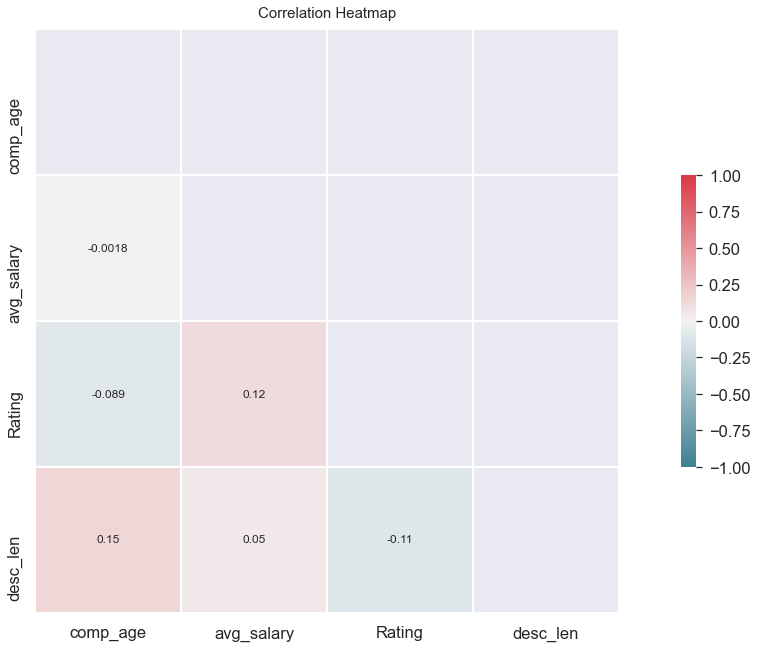

In [86]:
# plt config
sns.set(font_scale = 1.5)
plt.figure(figsize=(20, 10))


# Compute correlation matrix
corr = df[['comp_age', 'avg_salary', 'Rating', 'desc_len']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot heatmap with the configurations
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, linewidths=.5, annot=True, annot_kws={"fontsize":12},cmap=cmap, square = True, cbar_kws={"shrink": .5})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)

It seems that the features are not correlated linearly, which mean it is okay to use these variables for modelling.

#### Predictive Power Score (PPS)

PPS is an alternative to the correlation which have the following advantages:

    - It does't assume the relationships are symmetrical, which is a drawback of pearson correlation (e.g. zipcode can tell which 
    country you are from, but the reverse is not true.)
    - It can detect non-linear relationships between variables (unlike correlation which only detect linear relationship)
    - It works on both numerical and categorical data (Decision Tree Regressor to calculate MAE for numeric and 
    Decision Tree Classifier to calculate weighted F1 for categoric)  
    

As awesome as PPS could be, it has the following limitations:

    - The score cannot be interpreted easily because it does not inform type of relationship, thus its good for finding patterns, 
    but correlation is still better to be used to communicate linear relationships.
    - The scores are not comparable across different target variables in a strict mathematical way, since they are calculated 
    using differente evaluation metrics.
    - Default components might not be applicable, its up to user to decide if we want to use GLM instead of Decision Tree or using ROC instead of F1 for
    binary classifications.
    - PPS cannot detect interaction effects between features towards the target. 
    - Computationally slower than correlation.

In [ ]:
pps.score

<AxesSubplot:xlabel='x', ylabel='y'>

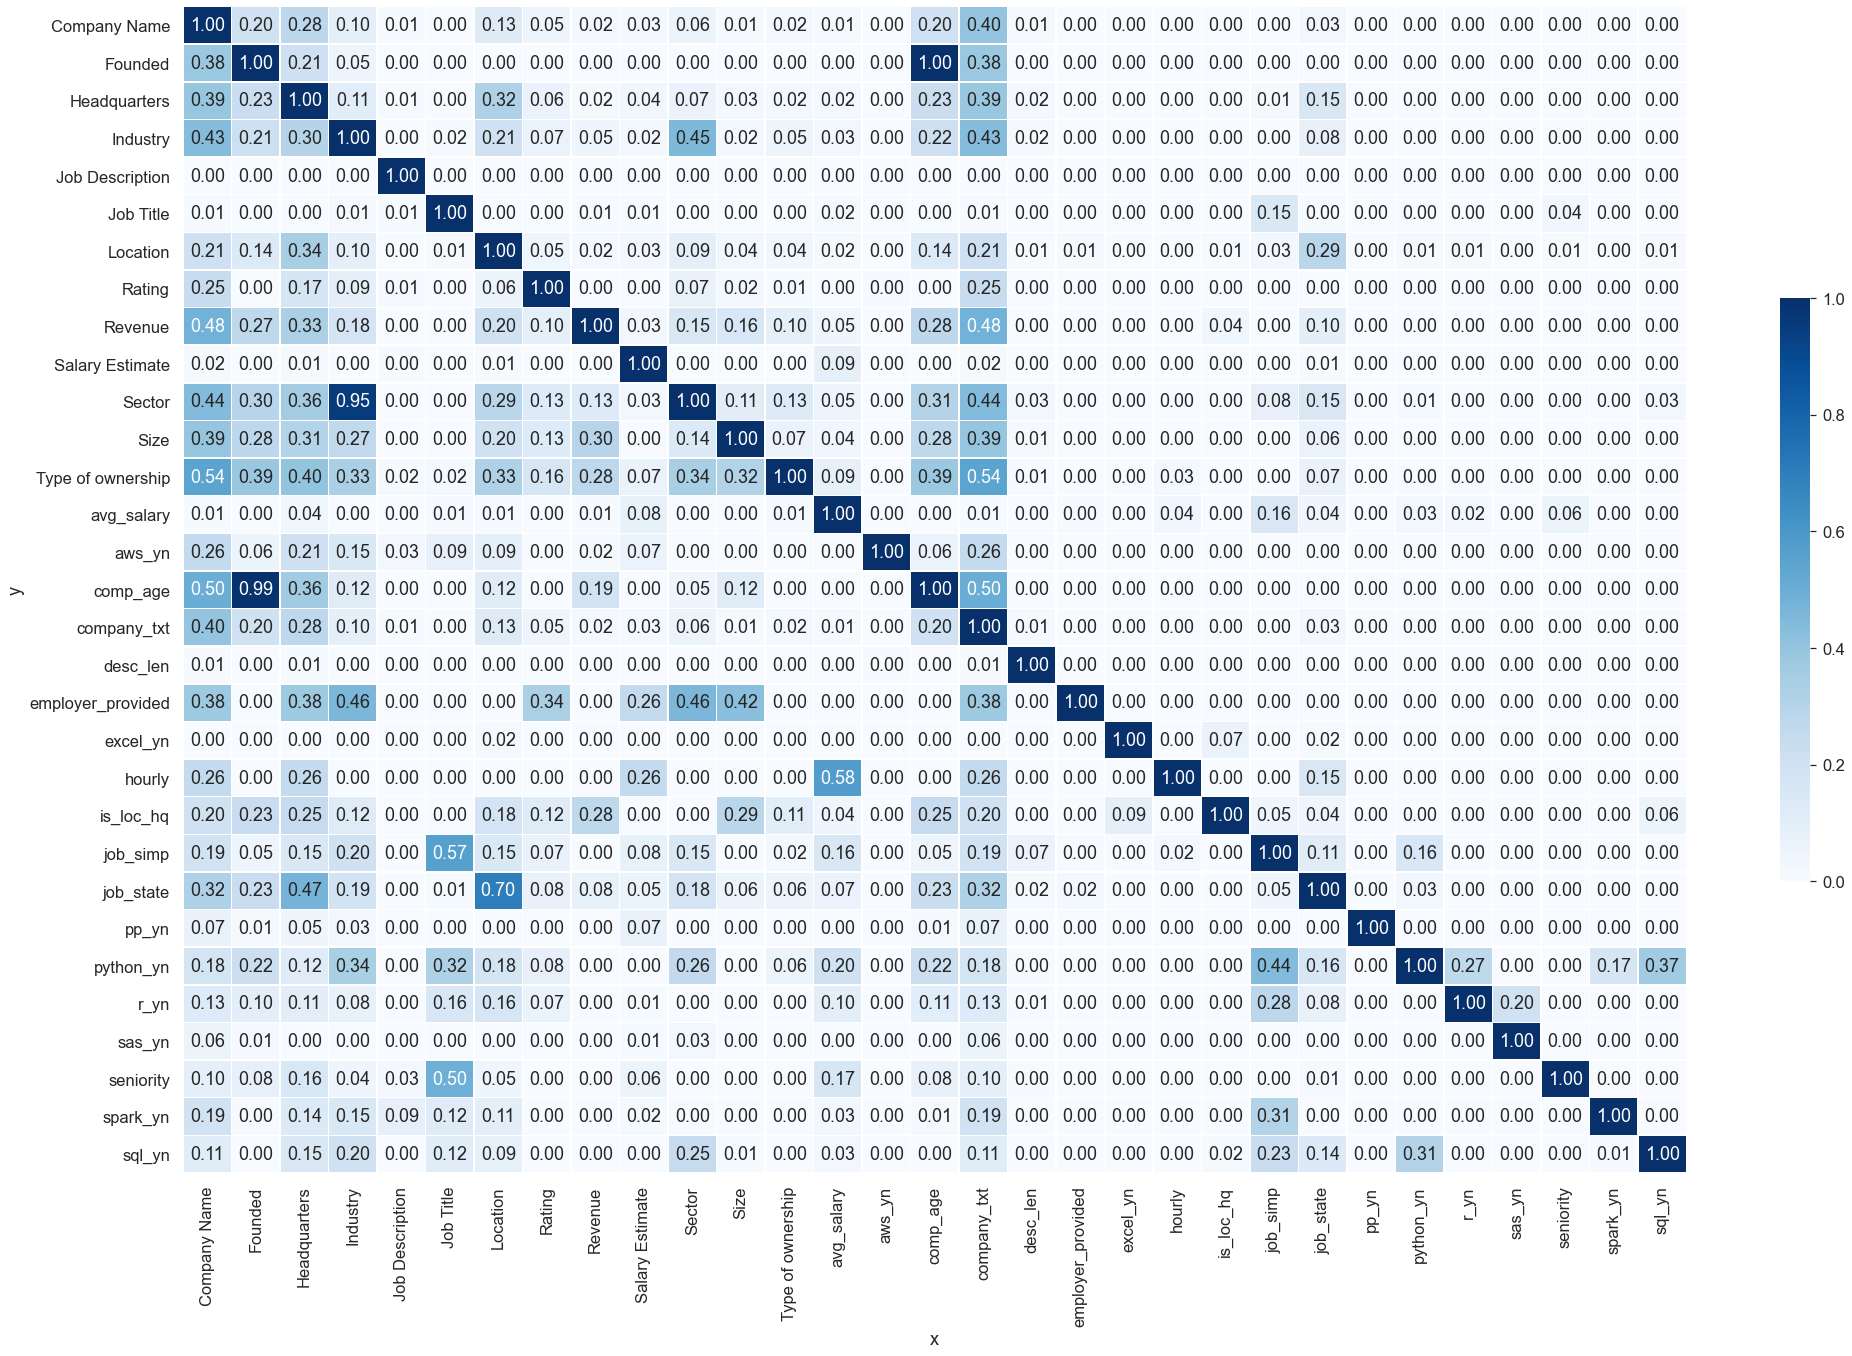

In [113]:
%%capture --no-display output

pps_matrix = pps.matrix(df[target_label+numerical+categorical])[['y', 'x', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(pps_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True, fmt=".2f",cbar_kws={"shrink": .5}, ax=ax)

## Pandas Profiling

In [22]:
profile = ProfileReport(df, title = 'Pandas Profiling Report', html = {'style':{'full_width':True}}) 

In [23]:
profile

Summarize dataset:   0%|          | 0/46 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1. From the pandas profiling report, there are `no missing data`, as it was handled with imputation. 
2. From the `warning` tab, we have identified the following `high cardinality` variables
    - Job Title has a high cardinality: 264 distinct values	High cardinality
    - Salary Estimate has a high cardinality: 416 distinct values	High cardinality
    - Job Description has a high cardinality: 463 distinct values	High cardinality
    - Company Name has a high cardinality: 343 distinct values	High cardinality
    - Location has a high cardinality: 200 distinct values	High cardinality
    - Headquarters has a high cardinality: 198 distinct values	High cardinality
    - Industry has a high cardinality: 60 distinct values	High cardinality
    - company_txt has a high cardinality: 343 distinct values	High cardinality
3. From the `warning` tab, we have identified the following `high correlation` variables
    - min_salary is highly correlated with max_salary and 1 other fields	High correlation
    - max_salary is highly correlated with min_salary and 1 other fields	High correlation
    - avg_salary is highly correlated with min_salary and 1 other fields	High correlation
    - Industry is highly correlated with Sector	High correlation
    - Sector is highly correlated with Industry	High correlation
4. From the `warning` tab, we have identified the following `uniformly distributed` variables
    - Salary Estimate is uniformly distributed	Uniform
    - Job Description is uniformly distributed	Uniform
    - Company Name is uniformly distributed	Uniform
    - company_txt is uniformly distributed	Uniform
    
The output on high cardinality and uniformly distributed variables are not surprising considering nature of the data.

High correlation between the `salary` variables are due to the fact its derived directly from original estimated salary variable.

## Extra

top 5 for Location: total = 200
New York, NY         37
San Francisco, CA    34
Cambridge, MA        28
Chicago, IL          18
Boston, MA           13
Name: Location, dtype: int64


top 5 for Headquarters: total = 198
New York, NY         34
San Francisco, CA    28
Chicago, IL          18
Cambridge, MA        12
Springfield, MA       8
Name: Headquarters, dtype: int64


graph for Size: total = 9


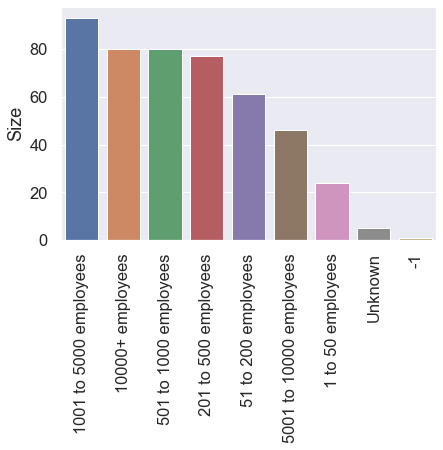

graph for Type of ownership: total = 11


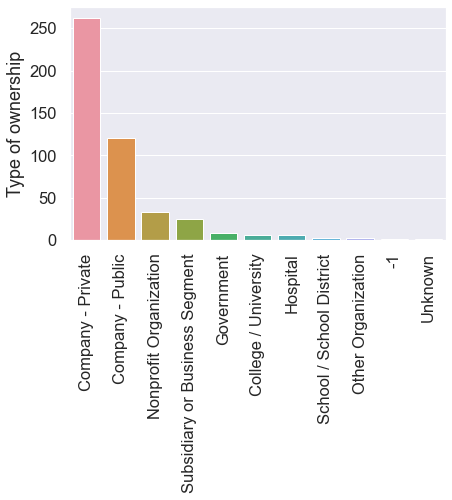

top 5 for Industry: total = 60
Biotech & Pharmaceuticals                  62
Insurance Carriers                         37
Computer Hardware & Software               37
IT Services                                36
Enterprise Software & Network Solutions    33
Name: Industry, dtype: int64


graph for Sector: total = 25


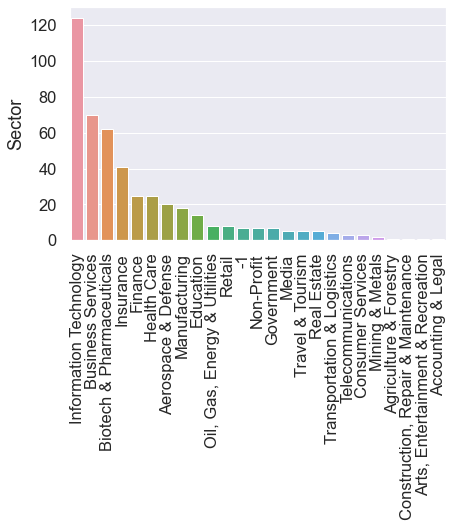

graph for Revenue: total = 14


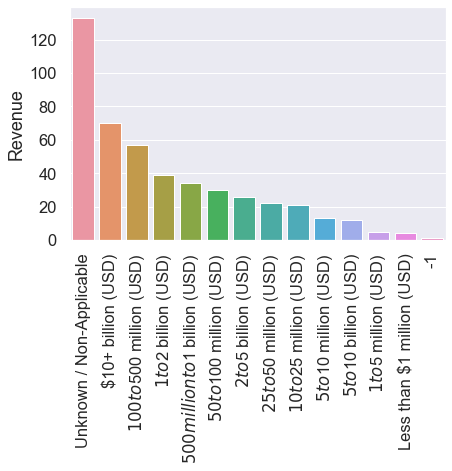

top 5 for company_txt: total = 343
MassMutual                8
Takeda Pharmaceuticals    7
Reynolds American         6
PNNL                      6
Numeric, LLC              5
Name: company_txt, dtype: int64


top 5 for job_state: total = 37
CA    99
MA    60
NY    47
VA    30
MD    22
Name: job_state, dtype: int64


graph for is_loc_hq: total = 2


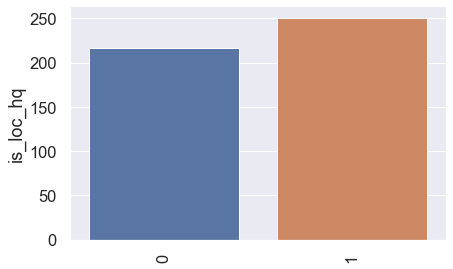

graph for python_yn: total = 2


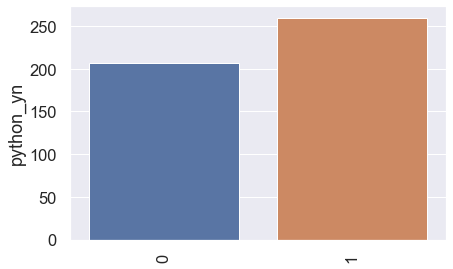

graph for r_yn: total = 2


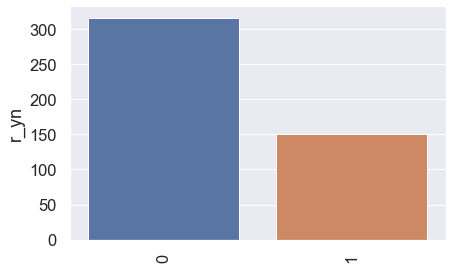

graph for sas_yn: total = 2


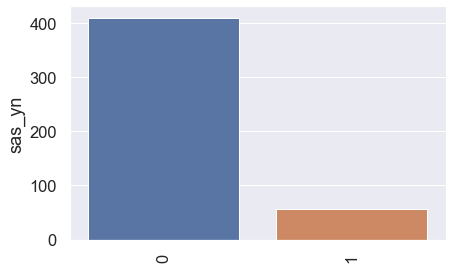

graph for excel_yn: total = 2


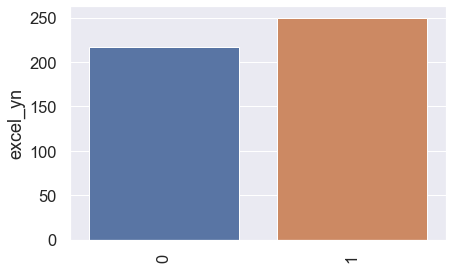

graph for pp_yn: total = 2


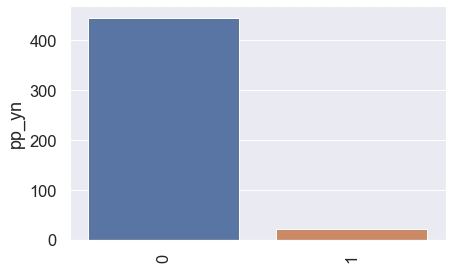

graph for sql_yn: total = 2


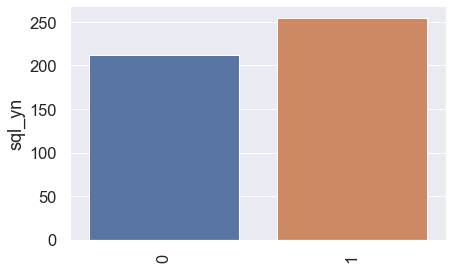

graph for spark_yn: total = 2


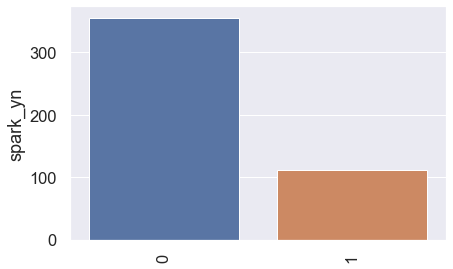

graph for aws_yn: total = 2


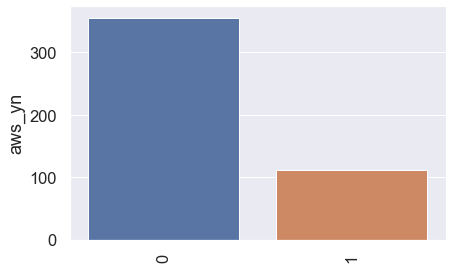

graph for job_simp: total = 7


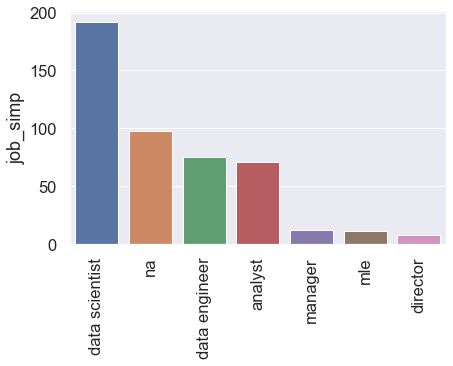

graph for seniority: total = 3


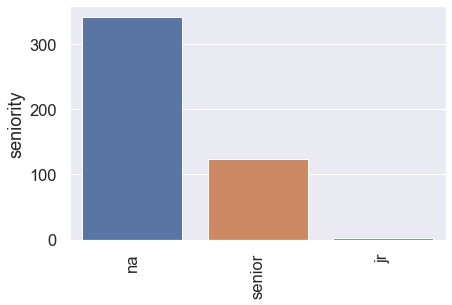

In [35]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    if len(cat_num) < 30:
        print("graph for %s: total = %d" % (i, len(cat_num)))
        ax = sns.barplot(x = cat_num.index, y = cat_num)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        plt.show()
    else:
        print("top 5 for %s: total = %d" % (i, len(cat_num)))
        print(df_cat[i].value_counts().head())
        print('\n')

In [36]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          75.000000
               na          85.346154
               senior     114.027778
data engineer  na         130.184211
               senior     170.250000
data scientist jr         147.000000
               na         147.566176
               senior     191.281818
director       na         216.875000
manager        na         121.125000
mle            na         155.875000
               senior     222.666667
na             na         104.272059
               senior     151.100000

In [40]:
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

`pandas profiling` allows a quick glance of the data with just a few line of codes. Intutively, I should be running this when I first get the data before any transformation, but since I learn about it when I am doing EDA, I think it's okay to just include it here.

In [41]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       1
          data scientist           2
          analyst                  2
WA        na                       1
          data scientist          11
          analyst                  3
VA        na                       2
          mle                      1
          data scientist          15
          data engineer            8
          analyst                  4
UT        data engineer            2
          analyst                  3
          data scientist           1
TX        na                       3
          data scientist           9
          data engineer            5
TN        data scientist           1
          data engineer            5
          analyst                  1
SC        na                       1
RI        analyst                  1
PA        manager                  2
          data engineer            1
          data scientist           4
          analyst                  5
          mle                      3
          na                       4
OR        data scientist           2
          data engineer            1
OH        na                       2
          data scientist           5
          analyst                  2
NY        na                       6
          mle                      1
          data scientist          28
          data engineer            3
          analyst                  9
NM        data scientist           2
NJ        data scientist           3
          analyst                  5
          data engineer            2
          manager                  1
          director                 1
          na                       1
NE        na                       3
NC        na                       5
          data scientist           2
          data engineer            4
MO        na                       2
          manager                  1
          data scientist           2
          analyst                  1
MN        data engineer            1
          analyst                  1
MI        manager                  1
          data scientist           3
MD        na                       9
          data scientist           9
          data engineer            1
          analyst                  3
MA        na                      25
          manager                  3
          director                 4
          data scientist          19
          data engineer            6
          analyst                  3
LA        analyst                  1
          data engineer            1
          na                       1
KY        na                       2
          data scientist           1
KS        mle                      1
IN        na                       3
          data scientist           2
          data engineer            2
IL        analyst                  2
          na                       2
          mle                      1
          director                 3
          data scientist           8
          data engineer            6
ID        analyst                  2
IA        analyst                  1
          data engineer            2
GA        data scientist           2
          na                       1
FL        data scientist           4
          data engineer            2
          analyst                  3
DE        na                       2
DC        data scientist           4
          data engineer            3
          analyst                  2
CT        na                       1
          data scientist           1
CO        mle                      1
          data engineer            1
          analyst                  1
          na                       1
          data scientist           3
CA        na                      17
          mle                      3
          manager                  4
          data scientist          48
          data engineer           15
          analyst             

In [43]:
pd.pivot_table(df[df['job_simp'] == 'data scientist'], index = ['job_state'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_state            
DC         209.750000
UT         194.500000
CA         192.510417
MO         165.250000
PA         160.000000
NY         157.750000
NC         156.500000
MI         155.500000
MD         155.000000
IL         153.375000
MA         152.447368
NJ         152.000000
WI         152.000000
CO         149.666667
VA         147.633333
OH         142.900000
WA         137.409091
OR         135.250000
FL         134.000000
TX         133.722222
TN         131.000000
IN         116.000000
KY         115.500000
CT         115.500000
GA         113.250000
NM         101.000000
AZ          95.000000

In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'is_loc_hq', 'comp_age', 'python_yn',
       'r_yn', 'sas_yn', 'excel_yn', 'pp_yn', 'sql_yn', 'spark_yn', 'aws_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [56]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, sql, pp, excel, aws, desc_len, type of ownership
df_pivots = df[['Rating','Industry','Sector','Revenue', 'hourly', 'employer_provided', 'python_yn', 'r_yn', 'sas_yn', 'excel_yn', 'pp_yn', 'sql_yn', 'spark_yn', 'aws_yn', 'Type of ownership', 'avg_salary']]

In [59]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(i)
        print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
    else:
        pass

Rating
        avg_salary
Rating            
 5.0    187.750000
-1.0    187.285714
 2.5    166.250000
 4.5    158.700000
 4.1    156.250000
 2.6    150.916667
 3.9    148.974359
 4.0    148.064516
 3.5    147.370968
 3.2    144.369565
 4.7    142.809524
 3.3    141.875000
 3.7    141.611111
 4.4    140.075000
 4.2    139.947368
 4.3    134.562500
 4.6    134.312500
 2.2    134.000000
 3.8    130.887500
 3.6    128.942308
 4.8    126.400000
 2.1    123.500000
 3.4    122.086207
 3.0    121.611111
 2.7    118.875000
 1.9    118.000000
 2.8    115.833333
 2.3    111.250000
 2.9    110.888889
 3.1    107.233333
 2.4     82.000000
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       226.500000
Motion Picture Production & Distribution  197.000000
Health, Beauty, & Fitness                 193.500000
Financial Analytics & Research            191.250000
Telecommunications Services            

In [62]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn                            0     1
Revenue                                     
$1 to $2 billion (USD)            11.0  28.0
$1 to $5 million (USD)             1.0   4.0
$10 to $25 million (USD)          11.0  10.0
$10+ billion (USD)                37.0  33.0
$100 to $500 million (USD)        24.0  33.0
$2 to $5 billion (USD)            11.0  15.0
$25 to $50 million (USD)          14.0   8.0
$5 to $10 billion (USD)            6.0   6.0
$5 to $10 million (USD)            6.0   7.0
$50 to $100 million (USD)         13.0  17.0
$500 million to $1 billion (USD)  16.0  18.0
-1                                 1.0   NaN
Less than $1 million (USD)         1.0   3.0
Unknown / Non-Applicable          55.0  78.0